## 8.3 

整数$M$の因数を探す非決定性プログラムについて

In [1]:
import numpy as np 

In [2]:
# 通常の方法
def factor_opt(inString):
    M = int(inString)
    M_prime = int(np.sqrt(M))

    for i in range(2,M_prime+1): 
        if M % i == 0: 
            return str(i)
    return 'no'  


In [3]:
factor_opt('10000')

'2'

In [4]:
%%timeit
factor_opt('111')

2.48 µs ± 144 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## (a): 非決定版のコードを書け

In [5]:
!cat factor_threading.py

import argparse
from threading import Thread
import utils
import numpy as np


def get_arguments():
    parser = argparse.ArgumentParser()

    parser.add_argument('--inString',
                        '-i',
                        type=str,
                        help=' factorization target')
    parser.add_argument('--K', '-K', type=int, help='number of threading')

    return parser.parse_args()


def factor_opt(M, search_range, nonDetSolution):

    for i in search_range:
        if M % i == 0:
            nonDetSolution.setSolution(str(i))


def main(args):

    M = int(args.inString)
    M_prime = int(np.sqrt(M))
    search_range = np.array([i + 2 for i in range(M_prime - 2)])

    splitted = np.array_split(search_range, args.K)

    ndSoln = utils.NonDetSolution()
    threads = []

    for split_range in splitted:
        t = Thread(target=factor_opt, args=(M, split_range, ndSoln))
        threads.append(t)

    res = utils.waitForOnePosOrAllNeg(threads, ndSoln)

    return res

## (b) マルチスレッドの実行

In [6]:
%%timeit
! python factor_threading.py -i 111 -K 2

3
3
3
3
3
3
3
3
441 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
! python factor_threading.py -i 111 -K 5

3
3
3
3
3
3
3
3
488 ms ± 48.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
! python factor_threading.py -i 111 -K 10

3
3
3
3
3
3
3
3
466 ms ± 19 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## (c) マルチプロセス化

In [9]:
! cat factor_multiprocess.py

import argparse
import numpy as np

import utils
import os
import time
import sys
from concurrent.futures import (
    ProcessPoolExecutor,
    as_completed
)

def get_arguments():
    parser = argparse.ArgumentParser()

    parser.add_argument('--inString',
                        '-i',
                        type=str,
                        help=' factorization target')
    parser.add_argument('--K', '-K', type=int, help='Number of process')

    return parser.parse_args()


def factor_opt(M, search_range):

    for i in search_range:
        if M % i == 0:
            return str(i)
    return 'no'



def main(args):

    M = int(args.inString)
    M_prime = int(np.sqrt(M))
    search_range = np.array([i + 2 for i in range(M_prime - 2)])
    splitted = np.array_split(search_range, args.K)

    res = 'no'

    with ProcessPoolExecutor() as e:
        futures = set([e.submit(factor_opt, M, split_range)
                   for split_range in splitted])


        for future in as_comple

In [10]:
%%timeit
! python factor_multiprocess.py -i 111 -K 10

3
3
3
3
3
3
3
3
472 ms ± 23.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit
! python factor_multiprocess.py -i 30000011 -K 4

3181
3181
3181
3181
3181
3181
3181
3181
469 ms ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit
! python factor_threading.py -i 30000011 -K 4

3181
3181
3181
3181
3181
3181
3181
3181
447 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
30000011 / 3181

9431.0

## 8.8 

長さが 3，7，11 のいずれかの倍数になっている遺伝子文字列を受理し，それ以外のすべての入力 を拒絶する非決定性チューリングマシンを作れ.


## 解答
通常のチューリングマシンは以下のように作成することが出来る。

In [14]:
import sys
from utils import rf
from simulateTM import simulateTM

sys.path.append('../chapter5')
from tm_to_diagram import tm_to_diagram

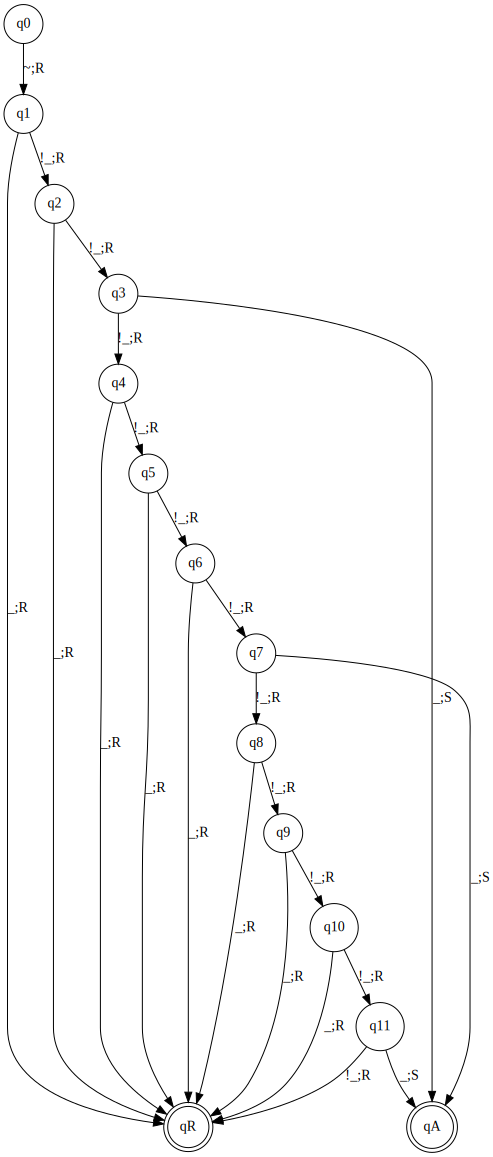

In [15]:
tm_to_diagram(rf('q8_8.tm'))


In [16]:
test_cases = ['t' * (i+1) for i in range(12)]

for ind, val in enumerate(test_cases):
    res = simulateTM(rf('q8_8.tm'), val)
    print(f'length {ind+1} case: ans={res}')

length 1 case: ans=no
length 2 case: ans=no
length 3 case: ans=yes
length 4 case: ans=no
length 5 case: ans=no
length 6 case: ans=no
length 7 case: ans=yes
length 8 case: ans=no
length 9 case: ans=no
length 10 case: ans=no
length 11 case: ans=yes
length 12 case: ans=no


このチューリングマシンを非決定チューリングマシンにするには

q3のときに2つのチューリングマシンのクローンを用意すればよい
- クローン1: 文字列の長さが4であれば受理し、そうでなければ拒絶
- クローン2: 文字列の長さが8であれば受理し、そうでなければ拒絶

元のチューリングマシンとクローン1, 2のいずれかが受理されれば、通常のチューリングマシンと同様に動作する。